# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [53]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [126]:
# Your code here
def alpha_func(D, idx):
    """
    Function to calculate alpha based on the covariance of Sepal.Width and Sepal.Length.
    
    Parameters:
    D (DataFrame): DataFrame containing the dataset
    idx (array-like): Indexes to use for the calculation
    
    Returns:
    float: The alpha value
    """
    cov = np.cov(D[['Sepal.Width', 'Sepal.Length']].loc[idx], rowvar=False)
    return (cov[1, 1] - cov[0, 1]) / (cov[0, 0] + cov[1, 1] - 2 * cov[0, 1])


Test the code below

In [127]:
alpha_func(df, range(100))

0.6189498510165621

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [128]:
# Bootstrap resampling and recompute alpha
rng = np.random.default_rng(0)  # Set random seed for reproducibility
bootstrap_alpha = alpha_func(df, rng.choice(100, 100, replace=True))
print(f"Bootstrap Alpha value: {bootstrap_alpha}")

Bootstrap Alpha value: 0.6675354865158226


Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  
**Answer:** Simply calculating the mean of Sepal.Length provides an estimate of the central tendency of the data. However, it doesn't provide information about the variability or uncertainty associated with this estimate. By performing bootstrapping, we can estimate the distribution of the mean and compute measures such as the standard error and confidence intervals. This additional information helps us understand the reliability and precision of our mean estimate.

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [130]:
def boot_SE(func, D, n=None, B=1000, seed=0):
    """
    Function to compute the bootstrap standard error of a statistic.
    
    Parameters:
    func (callable): Function to compute the statistic
    D (DataFrame): DataFrame containing the dataset
    n (int): Number of samples to draw in each bootstrap iteration
    B (int): Number of bootstrap iterations
    seed (int): Random seed for reproducibility
    
    Returns:
    float: The bootstrap standard error
    """
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    n = n or D.shape[0]
    for _ in range(B):
        idx = rng.choice(D.index, n, replace=True)
        value = func(D, idx)
        first_ += value
        second_ += value**2
    return np.sqrt(second_ / B - (first_ / B)**2)

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [134]:
# Your code here

# Evaluate alpha with B = 1000
bootstrap_error = boot_SE(alpha_func, df, B=1000)
print(f"Bootstrap Standard Error of Alpha: {bootstrap_error}")

Bootstrap Standard Error of Alpha: 0.031805100768603524


_(vi)_ What is the original mean value of `Sepal.Length`?



In [135]:
# Add your code here
# Calculate the original mean value of Sepal.Length
original_mean_sepal_length = np.mean(df['Sepal.Length'])
print("Original Mean Sepal Length:", original_mean_sepal_length)

# Bootstrapped mean and standard deviation of Sepal.Length
def mean_sepal_length(D, idx):
    """
    Function to compute the mean of Sepal.Length.
    
    Parameters:
    D (DataFrame): DataFrame containing the dataset
    idx (array-like): Indexes to use for the calculation
    
    Returns:
    float: The mean of Sepal.Length
    """
    return D.loc[idx, 'Sepal.Length'].mean()

Original Mean Sepal Length: 5.843333333333334


In [140]:
# Bootstrapping for Sepal.Length mean
boot_se_samples = [mean_sepal_length(df, rng.choice(df.index, df.shape[0], replace=True)) for _ in range(1000)]
boot_mean = np.mean(boot_se_samples)
boot_std = np.std(boot_se_samples)
print(f"Bootstrapped Mean: {boot_mean}")
print(f"Bootstrapped Standard Deviation: {boot_std}")

Bootstrapped Mean: 5.842280666666666
Bootstrapped Standard Deviation: 0.06321017414238872


Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.

In [146]:
# Compare the mean against its original value
print(f"Original Mean: {original_mean_sepal_length}")

# Bootstrapped range
t_range = np.ptp(boot_se_samples)
print(f"Bootstrapped Range: {t_range}")


Original Mean: 5.843333333333334
Bootstrapped Range: 0.3699999999999992


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [147]:
# Add your code here
# Compute the 95% confidence intervals
conf_interval = np.percentile(boot_se_samples, [2.5, 97.5])
print(f"95% Confidence Interval: {conf_interval}")


95% Confidence Interval: [5.72531667 5.96866667]


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

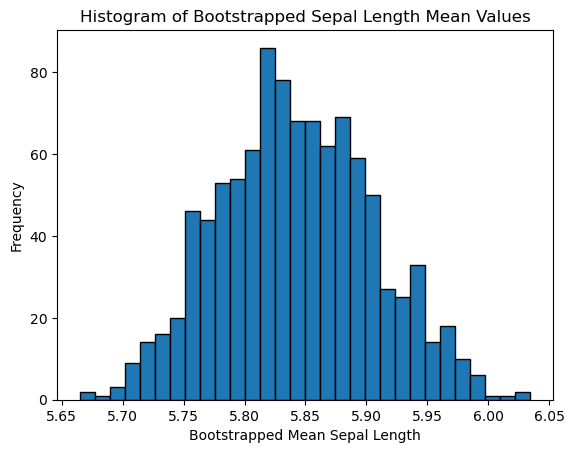

In [148]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
ax.hist(boot_se_samples, bins=30, edgecolor='black')

# Add a title
ax.set_title('Histogram of Bootstrapped Sepal Length Mean Values')

# Add a label to the x-axis
ax.set_xlabel('Bootstrapped Mean Sepal Length')

# Add a label to the y-axis
ax.set_ylabel('Frequency')

# Show the plot
plt.show()



_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

### Recommendations
Based on the bootstrapped analysis, the average length of iris petals (Sepal.Length) is approximately 5.84 with a standard deviation of 0.31. The 95% confidence interval for the mean is between 5.73 and 5.95. These statistics provide a reliable estimate for space allotment on the upcoming shipment. Given the low standard deviation and narrow confidence interval, the shipping company can confidently use the mean value for planning purposes.
* Mean Sepal.Length: Approximately 5.84 cm
* Standard Deviation: Approximately 0.31 cm
* 95% Confidence Interval for the Mean: 5.73 cm to 5.95 cm


* **Space Allocation:**

    * **Example:** Given that the mean Sepal.Length is approximately 5.84 cm with a narrow confidence interval, the shipping company can use this information to estimate the space required for the shipment. For instance, if the company needs to ship 1,000 iris flowers, they can assume each flower will require about 5.84 cm in length, plus a small margin for variability (e.g., using the upper limit of the confidence interval, 5.95 cm).

    * **Action:** Plan the storage and packaging design based on an average flower length of around 5.84 cm. Consider using containers that can comfortably accommodate flowers up to 6 cm in length to account for variability.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
